In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from collections import Counter

with open('tasks/23.txt', 'r') as f:
    data = f.read().splitlines()

In [3]:
elves = []
for i, line in enumerate(data):
    for j, letter in enumerate(line):
        if letter == '#':
            elves.append((i, j))

In [4]:
def check_neighbors(y, x, start_i):
    if  all([place not in elves for place in (
        (y-1, x-1), (y-1, x), (y-1, x+1),
        (y, x-1), (y, x+1),
        (y+1, x-1), (y+1, x), (y+1, x+1))]):
        return y, x
    for i in range(4):
        j = (start_i + i) % 4
        
        if j == 0: # north
            if all([place not in elves for place in ((y-1, x-1), (y-1, x), (y-1, x+1))]):
                return y-1, x

        elif j == 1: # south
            if all([place not in elves for place in ((y+1, x-1), (y+1, x), (y+1, x+1))]):
                return y+1, x 

        elif j == 2: # west
            if all([place not in elves for place in ((y+1, x-1), (y, x-1), (y-1, x-1))]):
                return y, x-1  

        elif j == 3: # east
            if all([place not in elves for place in ((y+1, x+1), (y, x+1), (y-1, x+1))]):
                return y, x+1 
    return y, x

In [5]:
for step in range(10):
    want_to_go = []
    for y, x in elves:
        new_y, new_x = check_neighbors(y, x, step)
        want_to_go.append((new_y, new_x))
    ways = dict(Counter(want_to_go))

    new_elves = []
    for i, elv in enumerate(elves):
        if ways[want_to_go[i]] > 1:
            new_elves.append(elv)
        else:
            new_elves.append(want_to_go[i])
    elves = new_elves

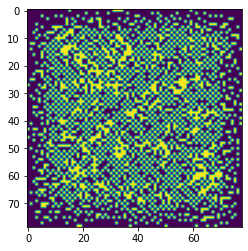

In [6]:
ys = [y[0] for y in elves]
xs = [x[1] for x in elves]

mask = np.zeros(((max(ys) - min(ys)+1),  (max(xs) - min(xs)+1)), bool)
for y, x in elves:
    mask[y-min(ys), x-min(xs)] = 1
plt.imshow(mask)

In [7]:
np.prod(mask.shape) - np.sum(mask)

3766

In [17]:
step = 0
while True:
    want_to_go = []
    for y, x in elves:
        new_y, new_x = check_neighbors(y, x, step)
        want_to_go.append((new_y, new_x))
    ways = dict(Counter(want_to_go))

    new_elves = []
    for i, elv in enumerate(elves):
        if ways[want_to_go[i]] > 1:
            new_elves.append(elv)
        else:
            new_elves.append(want_to_go[i])
    step += 1
    if elves == new_elves:
        break
    elves = new_elves
    

In [18]:
step

954